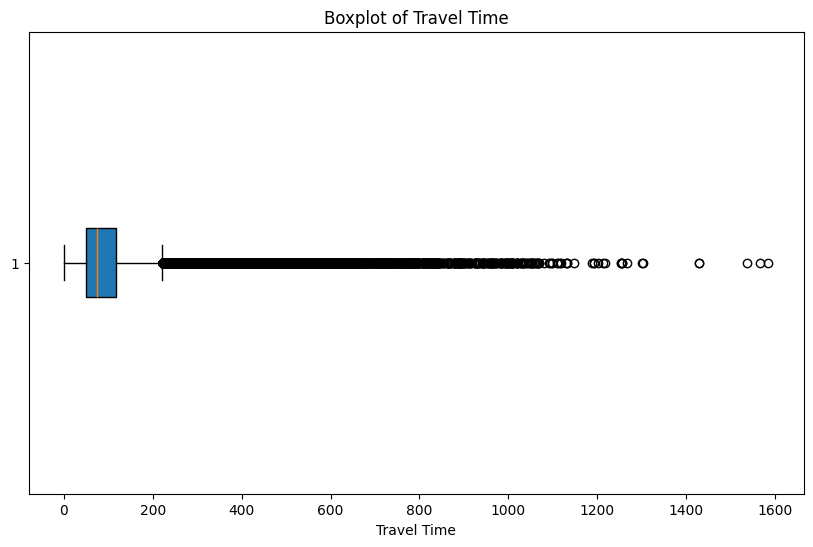

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('13_bus_up2.csv')
# travel_time의 boxplot 생성
plt.figure(figsize=(10, 6))
plt.boxplot(df['travel_time'], vert=False, patch_artist=True)
plt.title("Boxplot of Travel Time")
plt.xlabel("Travel Time")
plt.show()

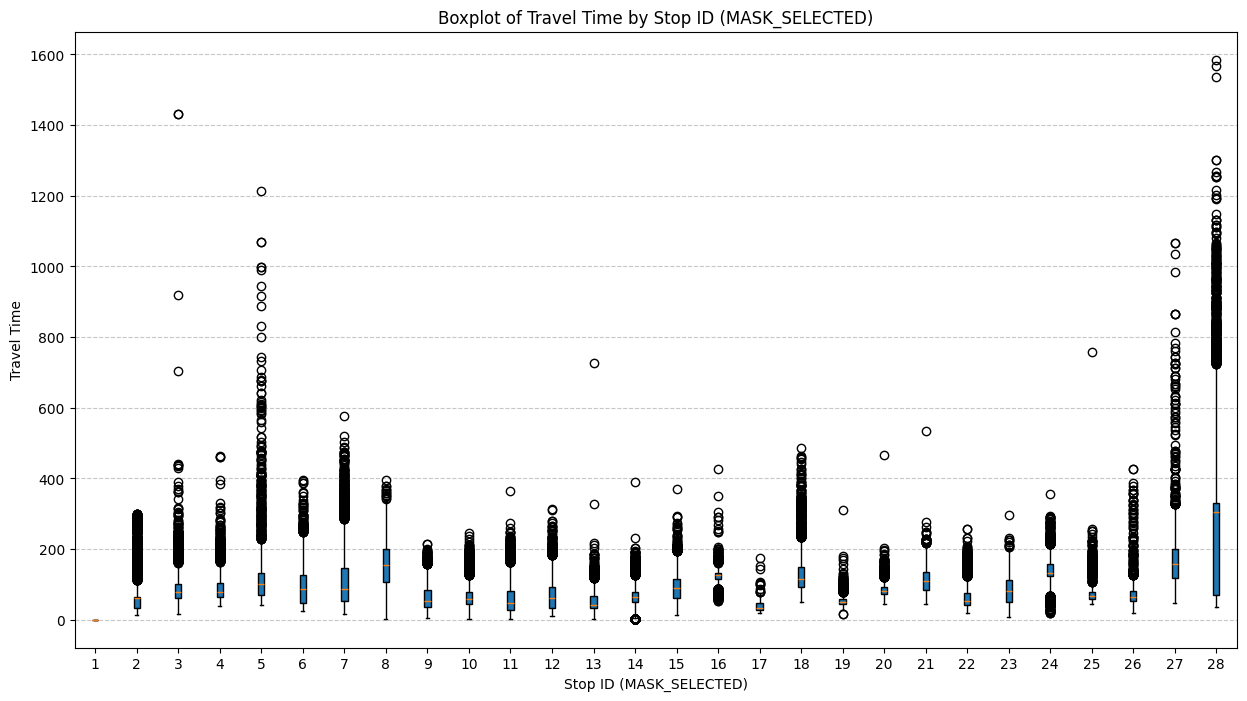

    Stop ID (MASK_SELECTED)                                           Outliers
0                         1                                                 []
1                         2  [143.0, 152.0, 231.0, 175.0, 173.0, 156.0, 124...
2                         3  [240.0, 437.0, 237.0, 261.0, 221.0, 294.0, 161...
3                         4  [219.0, 460.0, 171.0, 184.0, 242.0, 281.0, 262...
4                         5  [239.0, 308.0, 406.0, 267.0, 239.0, 240.0, 293...
5                         6  [252.0, 251.0, 247.0, 250.0, 296.0, 255.0, 273...
6                         7  [335.0, 287.0, 338.0, 361.0, 339.0, 423.0, 339...
7                         8  [358.0, 395.0, 377.0, 341.0, 368.0, 353.0, 351...
8                         9  [160.0, 178.0, 189.0, 166.0, 170.0, 169.0, 166...
9                        10  [132.0, 152.0, 135.0, 148.0, 174.0, 163.0, 166...
10                       11  [175.0, 200.0, 176.0, 192.0, 172.0, 193.0, 164...
11                       12  [278.0, 194.0, 186.0, 2

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# CSV 파일 읽기 (파일 경로 수정 필요)
df = pd.read_csv('13_bus_up2.csv')

# 가정: 'MASK_SELECTED' 컬럼에 정류장 번호, 'travel_time' 컬럼에 도착 시간 저장

# 정류장 번호 기준으로 데이터 그룹화
grouped_data = df.groupby('MASK_SELECTED')['travel_time']

# Outlier를 감지하고 시각화
outliers = {}  # 각 정류장별 Outlier 저장
plt.figure(figsize=(15, 8))

for stop_id, travel_times in grouped_data:
    Q1 = travel_times.quantile(0.25)
    Q3 = travel_times.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[stop_id] = travel_times[(travel_times < lower_bound) | (travel_times > upper_bound)].tolist()
    
    # 각 정류장의 데이터로 boxplot 생성
    plt.boxplot(travel_times, positions=[stop_id], patch_artist=True)

# 그래프 설정
plt.title("Boxplot of Travel Time by Stop ID (MASK_SELECTED)")
plt.xlabel("Stop ID (MASK_SELECTED)")
plt.ylabel("Travel Time")
plt.xticks(range(1, 29))  # 1~28 정류장
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Outlier 정보 출력
outliers_df = pd.DataFrame(list(outliers.items()), columns=["Stop ID (MASK_SELECTED)", "Outliers"])
print(outliers_df)


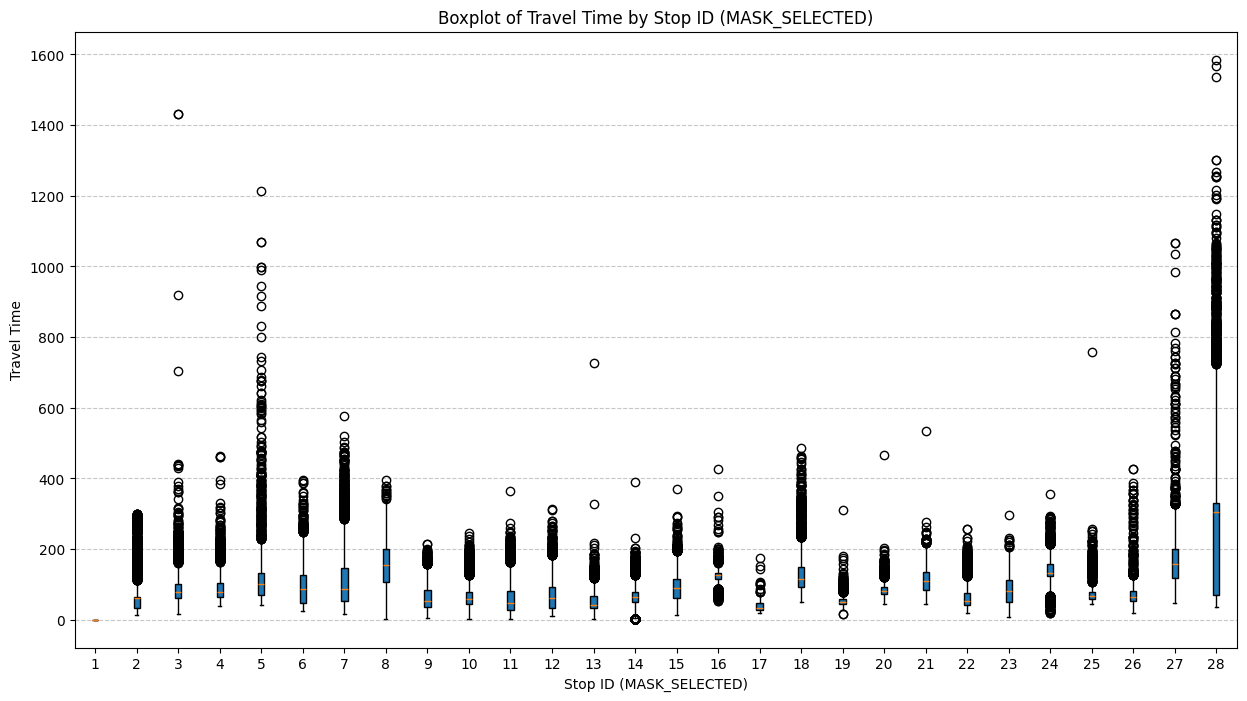

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# CSV 파일 읽기 (파일 경로 수정 필요)
df = pd.read_csv('13_bus_up2.csv')

# 가정: 'MASK_SELECTED' 컬럼에 정류장 번호, 'travel_time' 컬럼에 도착 시간 저장

# 정류장 번호 기준으로 데이터 그룹화
grouped_data = df.groupby('MASK_SELECTED')['travel_time']

# Outlier와 기준값 저장
outlier_info = []  # 각 정류장별 Outlier 정보와 기준값 저장
plt.figure(figsize=(15, 8))

for stop_id, travel_times in grouped_data:
    Q1 = travel_times.quantile(0.2)
    Q3 = travel_times.quantile(0.7)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = travel_times[(travel_times < lower_bound) | (travel_times > upper_bound)].tolist()
    
    # Outlier 정보와 기준값 저장
    outlier_info.append({
        "Stop ID (MASK_SELECTED)": stop_id,
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outliers": outliers
    })
    
    # 각 정류장의 데이터로 boxplot 생성
    plt.boxplot(travel_times, positions=[stop_id], patch_artist=True)

# 그래프 설정
plt.title("Boxplot of Travel Time by Stop ID (MASK_SELECTED)")
plt.xlabel("Stop ID (MASK_SELECTED)")
plt.ylabel("Travel Time")
plt.xticks(range(1, 29))  # 1~28 정류장
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Outlier 정보 DataFrame 생성 및 출력
outlier_info_df = pd.DataFrame(outlier_info)

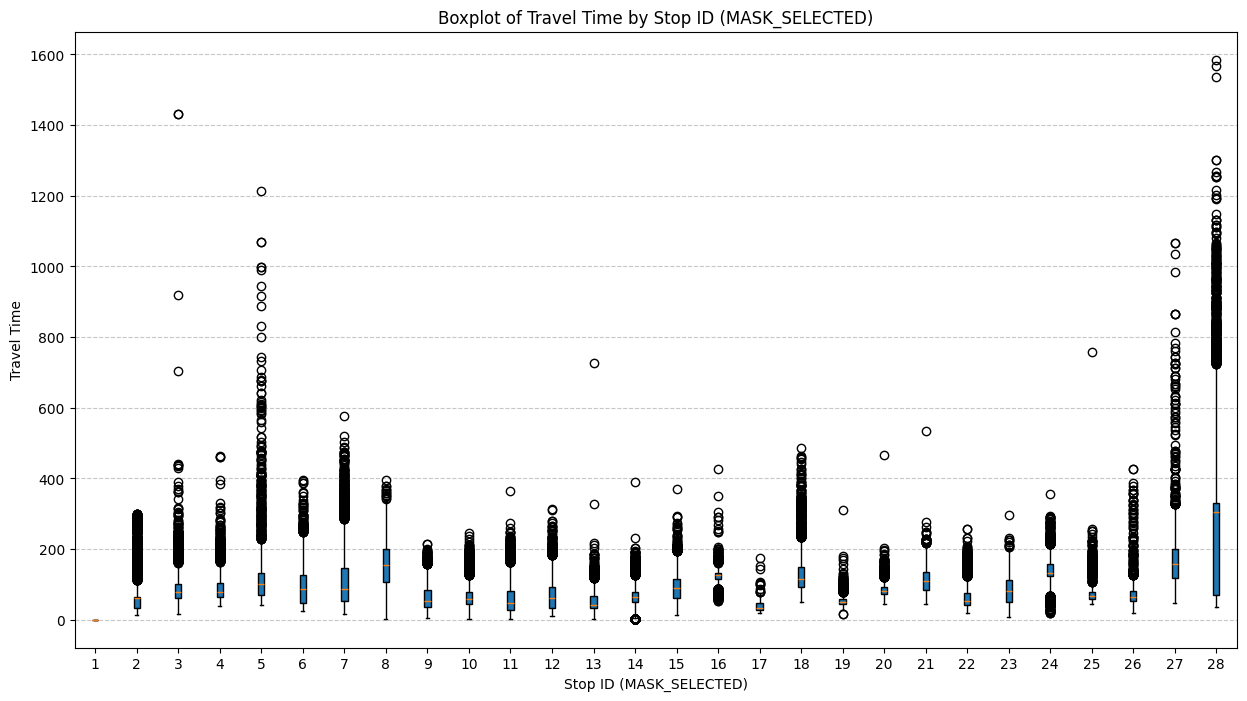

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# CSV 파일 읽기 (파일 경로 수정 필요)
df = pd.read_csv('13_bus_up2.csv')

# 정류장 번호 기준으로 데이터 그룹화
grouped_data = df.groupby('MASK_SELECTED')['travel_time']

# Outlier 저장
outlier_first_occurrences = []  # 각 정류장별 Outlier 첫 번째 값 저장
plt.figure(figsize=(15, 8))

for stop_id, travel_times in grouped_data:
    Q1 = travel_times.quantile(0.25)
    Q3 = travel_times.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Outlier 조건
    outliers = travel_times[(travel_times < lower_bound) | (travel_times > upper_bound)]
    first_outlier = outliers.iloc[0] if not outliers.empty else None
    
    # Outlier 첫 번째 값 저장
    outlier_first_occurrences.append({
        "Stop ID (MASK_SELECTED)": stop_id,
        "First Outlier": first_outlier,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound
    })
    
    # 각 정류장의 데이터로 boxplot 생성
    plt.boxplot(travel_times, positions=[stop_id], patch_artist=True)

# 그래프 설정
plt.title("Boxplot of Travel Time by Stop ID (MASK_SELECTED)")
plt.xlabel("Stop ID (MASK_SELECTED)")
plt.ylabel("Travel Time")
plt.xticks(range(1, 29))  # 1~28 정류장
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Outlier 첫 번째 값 정보 DataFrame 생성 및 출력
outlier_first_df = pd.DataFrame(outlier_first_occurrences)
import ace_tools as tools; tools.display_dataframe_to_user(name="First Outlier Information by Stop ID", dataframe=outlier_first_df)


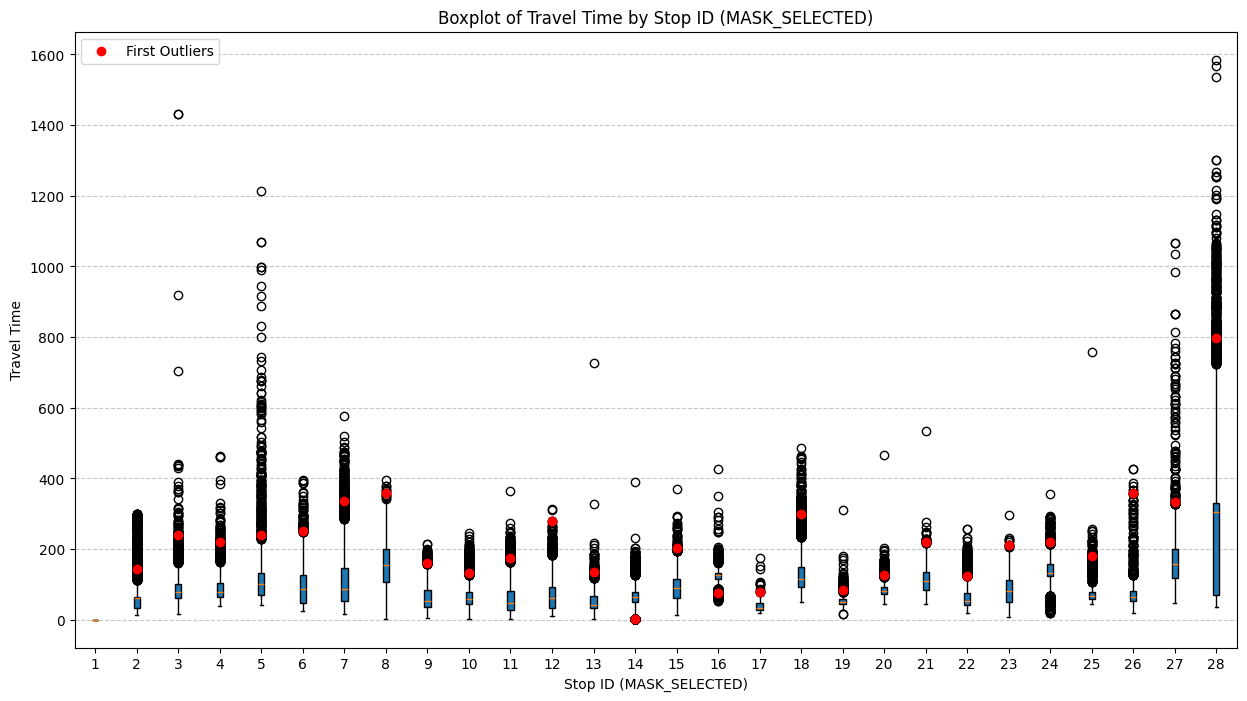

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# CSV 파일 읽기 (파일 경로 수정 필요)
df = pd.read_csv('13_bus_up2.csv')

# 정류장 번호 기준으로 데이터 그룹화
grouped_data = df.groupby('MASK_SELECTED')['travel_time']

# Outlier 저장
first_outliers = []  # 각 정류장별 Outlier 첫 번째 값 저장
first_outlier_positions = []  # 그래프 상에서 위치 저장

plt.figure(figsize=(15, 8))

for stop_id, travel_times in grouped_data:
    Q1 = travel_times.quantile(0.25)
    Q3 = travel_times.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Outlier 조건
    outliers = travel_times[(travel_times < lower_bound) | (travel_times > upper_bound)]
    if not outliers.empty:
        first_outliers.append(outliers.iloc[0])
        first_outlier_positions.append(stop_id)
    else:
        first_outliers.append(None)
        first_outlier_positions.append(None)
    
    # 각 정류장의 데이터로 boxplot 생성
    plt.boxplot(travel_times, positions=[stop_id], patch_artist=True)

# Outlier 처음 걸린 값 시각화
plt.scatter(first_outlier_positions, first_outliers, color='red', label='First Outliers', zorder=5)

# 그래프 설정
plt.title("Boxplot of Travel Time by Stop ID (MASK_SELECTED)")
plt.xlabel("Stop ID (MASK_SELECTED)")
plt.ylabel("Travel Time")
plt.xticks(range(1, 29))  # 1~28 정류장
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


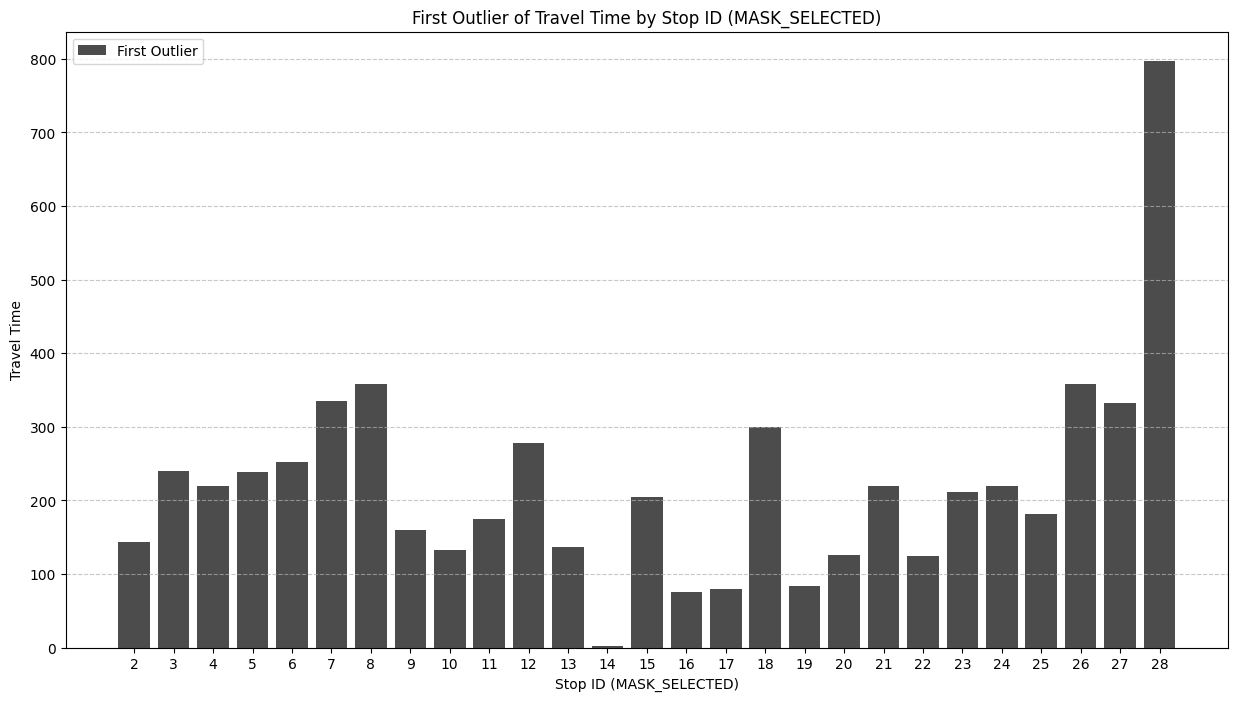

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# CSV 파일 읽기 (파일 경로 수정 필요)
df = pd.read_csv('13_bus_up2.csv')

# 정류장 번호 기준으로 데이터 그룹화
grouped_data = df.groupby('MASK_SELECTED')['travel_time']

# Outlier 저장
outlier_first_occurrences = []  # 정류장별 Outlier 첫 번째 값
stop_ids_with_outliers = []  # Outlier가 있는 정류장 번호

for stop_id, travel_times in grouped_data:
    Q1 = travel_times.quantile(0.25)
    Q3 = travel_times.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Outlier 조건
    outliers = travel_times[(travel_times < lower_bound) | (travel_times > upper_bound)]
    if not outliers.empty:
        stop_ids_with_outliers.append(stop_id)
        outlier_first_occurrences.append(outliers.iloc[0])

# 막대 그래프 생성
plt.figure(figsize=(15, 8))
plt.bar(stop_ids_with_outliers, outlier_first_occurrences, color='black', alpha=0.7, label="First Outlier")

# 그래프 설정
plt.title("First Outlier of Travel Time by Stop ID (MASK_SELECTED)")
plt.xlabel("Stop ID (MASK_SELECTED)")
plt.ylabel("Travel Time")
plt.xticks(stop_ids_with_outliers)  # Outlier가 있는 정류장만 표시
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()
